In [ ]:
# Importing important libraries
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading the CSV file with Pandas

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/TUTORED_PROJECT/Datasets/patient-characteristics-survey-pcs-2017-1.csv",  skipinitialspace=True)

In [ ]:
df.shape

(187192, 67)

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
print(df.head())

   Survey Year Program Category         Region Served Age Group     Sex  \
0         2017       OUTPATIENT     CENTRAL NY REGION     ADULT  FEMALE   
1         2017          SUPPORT        WESTERN REGION     ADULT  FEMALE   
2         2017       OUTPATIENT     CENTRAL NY REGION     ADULT  FEMALE   
3         2017       OUTPATIENT  NEW YORK CITY REGION     ADULT  FEMALE   
4         2017       OUTPATIENT     CENTRAL NY REGION     ADULT    MALE   

           Transgender        Sexual Orientation       Hispanic Ethnicity  \
0  NO, NOT TRANSGENDER  STRAIGHT OR HETEROSEXUAL  NO, NOT HISPANIC/LATINO   
1  NO, NOT TRANSGENDER                   UNKNOWN  NO, NOT HISPANIC/LATINO   
2  NO, NOT TRANSGENDER  STRAIGHT OR HETEROSEXUAL  NO, NOT HISPANIC/LATINO   
3  NO, NOT TRANSGENDER  STRAIGHT OR HETEROSEXUAL  NO, NOT HISPANIC/LATINO   
4  NO, NOT TRANSGENDER  STRAIGHT OR HETEROSEXUAL  NO, NOT HISPANIC/LATINO   

         Race   Living Situation  ... Unknown Insurance Coverage No Insurance  \
0  WH

In [ ]:
# Removing the null values
df.dropna(how = 'any')

# Remove Unknown data from the dataframe
for column in df.columns:
    df = df[(df[column] != 'UNKNOWN')]

In [ ]:
# Encoding the data to numberical to better calculation

le = preprocessing.LabelEncoder()

for column in df.columns:
    df[column] = le.fit_transform(df[column])

In [ ]:
print(df)

        Survey Year  Program Category  Region Served  Age Group  Sex  \
2                 0                 2              0          0    0   
4                 0                 2              0          0    1   
7                 0                 2              3          0    0   
8                 0                 2              0          0    0   
10                0                 2              4          0    1   
...             ...               ...            ...        ...  ...   
187184            0                 3              3          0    0   
187186            0                 2              2          0    0   
187187            0                 3              4          0    1   
187190            0                 3              3          0    0   
187191            0                 2              0          1    0   

        Transgender  Sexual Orientation  Hispanic Ethnicity  Race  \
2                 1                   4                   0     4 

In [ ]:
# Spliting the data into features and label

X = df.loc[:, df.columns != 'Stroke']
Y = df.loc[:, ['Stroke']].values.ravel()

In [ ]:
len(X.columns)

66

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

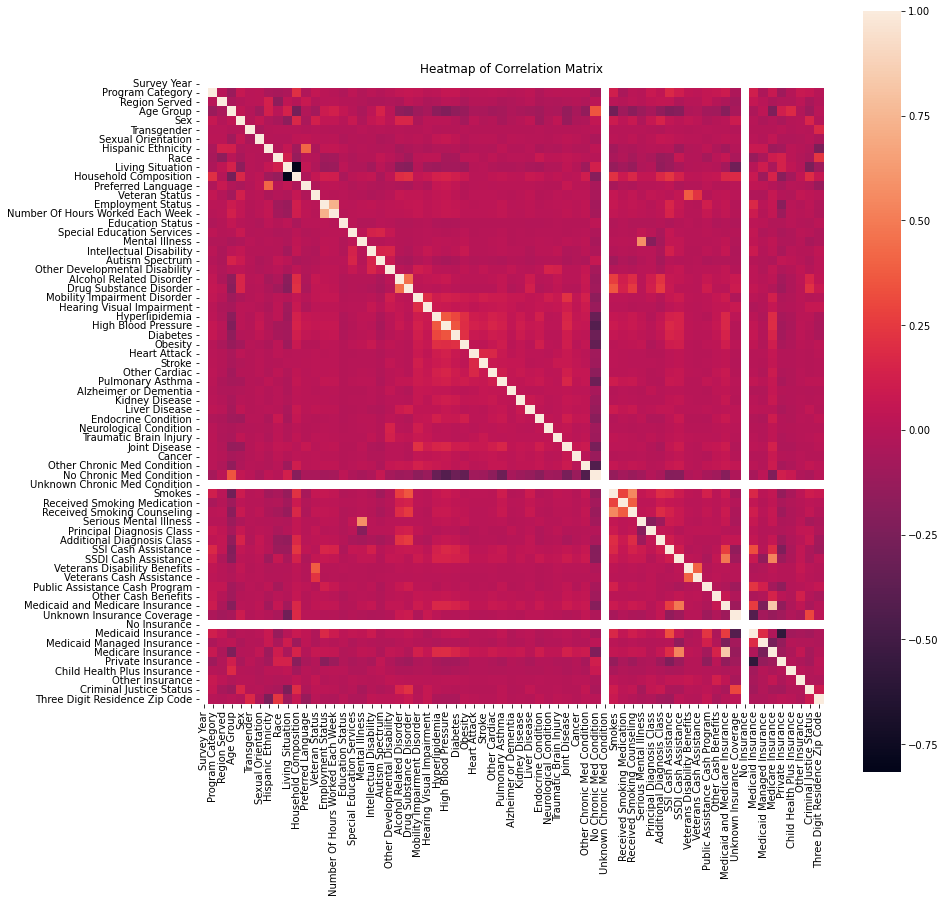

In [ ]:
import seaborn as sns

corr=df.corr()
corr = (corr)
plt.figure(figsize=(14,14))
ax = sns.heatmap(corr, cbar = True,  square = True, fmt= '.2f',annot_kws=

{'size': 15},
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
ax.set_title('Heatmap of Correlation Matrix')

In [ ]:
# Applied Features Importance for feature selection

model_feature_importance=ExtraTreesClassifier()
model_feature_importance.fit(X,Y)

print(model_feature_importance.feature_importances_)

[0.         0.03218247 0.03671443 0.00073877 0.02386044 0.00265007
 0.01175998 0.01891406 0.03397051 0.01299836 0.0309202  0.01815484
 0.00794609 0.02299631 0.01250826 0.03850767 0.00047099 0.00165675
 0.01346687 0.00204516 0.01308241 0.01667127 0.01955011 0.01676747
 0.01468828 0.01905796 0.01531146 0.02072106 0.02116408 0.03119753
 0.01292046 0.01847737 0.0068205  0.01012357 0.00887811 0.01423041
 0.00749923 0.01053308 0.01660419 0.011011   0.02302729 0.00365983
 0.         0.02290039 0.01024997 0.01813434 0.00369031 0.01148694
 0.03513739 0.02442028 0.02029783 0.0021689  0.00106829 0.02084721
 0.01600293 0.01335201 0.00325653 0.         0.01202665 0.02567738
 0.01397014 0.01237059 0.00151997 0.00979711 0.01123482 0.05593115]


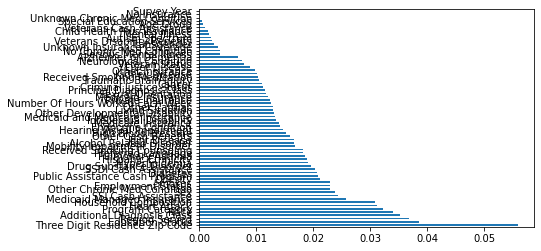

In [ ]:
# For better understanding, visualize the graph

feat_importances = pd.Series(model_feature_importance.feature_importances_, index = X.columns)

feat_importances.nlargest(66).plot(kind = 'barh')
plt.show()

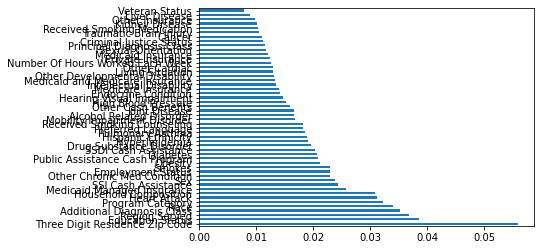

In [ ]:
# For better understanding, visualize the graph

feat_importances = pd.Series(model_feature_importance.feature_importances_, index = X.columns)

feat_importances.nlargest(50).plot(kind = 'barh')
plt.show()

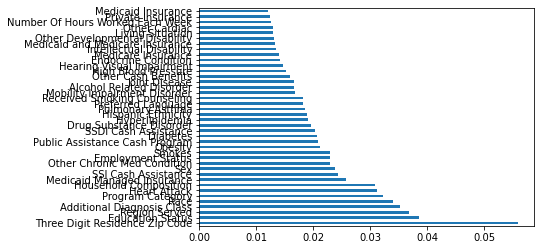

In [ ]:
# For better understanding, visualize the graph

feat_importances = pd.Series(model_feature_importance.feature_importances_, index = X.columns)

feat_importances.nlargest(40).plot(kind = 'barh')
plt.show()

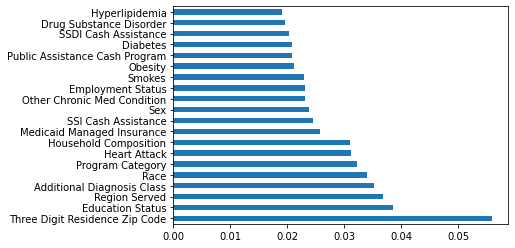

In [ ]:
# For better understanding, visualize the graph

feat_importances = pd.Series(model_feature_importance.feature_importances_, index = X.columns)

feat_importances.nlargest(20).plot(kind = 'barh')
plt.show()

In [ ]:
features = df.loc[:, ['Hyperlipidemia','Employment Status','Drug Substance Disorder','Diabetes','Public Assistance Cash Program','Obesity','Smokes','Other Chronic Med Condition','Sex','SSI Cash Assistance','Medicaid Managed Insurance','Household Composition', 'Race', 'Program Category', 'Heart Attack', 'Additional Diagnosis Class', 'Education Status', 'Region Served', 'Three Digit Residence Zip Code']]
label = Y

KeyError: ignored

In [ ]:
len(features.columns)

19

In [ ]:
print(features)

        Hyperlipidemia  Employment Status  Drug Substance Disorder  Diabetes  \
2                    0                  2                        0         1   
4                    0                  3                        0         0   
7                    1                  2                        1         0   
8                    0                  2                        0         0   
10                   0                  0                        0         0   
...                ...                ...                      ...       ...   
187184               1                  2                        0         1   
187186               0                  0                        0         0   
187187               0                  2                        1         0   
187190               1                  2                        0         1   
187191               0                  2                        0         0   

        Public Assistance Cash Program 

In [ ]:
print(label)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn import svm
# Selecting the appropriate model by checking their accuracy

models=[]
models.append(("KNN",KNeighborsClassifier()))
models.append(("Support vector Machine",SVC()))
models.append(("GaussianNB",GaussianNB()))
models.append(("Decesion",DecisionTreeClassifier()))

In [ ]:
# Setting up the parameters for kFold

kv=KFold(n_splits=10, random_state=8, shuffle=True)

In [ ]:
# Checking the accuracy for each listed above model

for names,model in models:
    results=cross_val_score(model,features,label,cv=kv,scoring="accuracy")
    print(names,results.mean(),"\n")

KNN 0.9849886788291592 

Support vector Machine 0.9850351088748045 

GaussianNB 0.9746045781629759 

Decesion 0.9655823903734767 



In [ ]:
#Gaussian Naive Bayes 

# Split features and label in train and test
X_train, X_test, Y_train, Y_test = train_test_split(features, label, test_size=0.5, random_state=0)

# Call GaussianNB object
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, Y_train)

# Predict the test data
Y_pred = gnb.predict(X_test)
print(Y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
# Print the Accuracy score

print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred) * 100, '%')

Accuracy: 97.49914884397536 %


In [ ]:
#KNN

# Split features and label in train and test
X_train, X_test, Y_train, Y_test = train_test_split(features, label, test_size=0.5, random_state=0)

# Call GaussianNB object
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train, Y_train)

# Predict the test data
Y_pred = knn.predict(X_test)
print(Y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
# Print the Accuracy score

print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred) * 100, '%')

Accuracy: 98.61957968367948 %


## Training accuracy: 0.9849886788291592 
## Test accuracy: 98.61957968367948 %

In [ ]:
#SVM

# Split features and label in train and test
X_train, X_test, Y_train, Y_test = train_test_split(features, label, test_size=0.5, random_state=0)

# Call GaussianNB object
SVM = SVC()

# Train the model
SVM.fit(X_train, Y_train)

# Predict the test data
Y_pred = SVM.predict(X_test)
print(Y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
# Print the Accuracy score

print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred) * 100, '%')

Accuracy: 98.62267479649634 %


##Traning accuracy:0.9850351088748045 
## Testing accuracy: 98.62267479649634 %

In [ ]:
#Decision 

# Split features and label in train and test
X_train, X_test, Y_train, Y_test = train_test_split(features, label, test_size=0.5, random_state=0)

# Call GaussianNB object
decisiontree = DecisionTreeClassifier()

# Train the model
decisiontree.fit(X_train, Y_train)

# Predict the test data
Y_pred = decisiontree.predict(X_test)
print(Y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
# Print the Accuracy score

print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred) * 100, '%')

Accuracy: 96.44371537342536 %


## Training accuracy: 0.9655823903734767 
## Testing accuracy: 96.44371537342536 %

In [ ]:
# ROC Curve

fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred)
print("False Positive Rate", fpr)
print("True Positive Rate", tpr)
print("Threshold", thresholds)

False Positive Rate [0.         0.02316093 1.        ]
True Positive Rate [0.         0.07640449 1.        ]
Threshold [2 1 0]


In [ ]:
# Logarithmic Loss

log_loss = metrics.log_loss(Y_test, Y_pred)
print("Logarithmic Loss: ", log_loss)

Logarithmic Loss:  1.228315459489798


In [ ]:
# print the Classification Report

class_report = classification_report(Y_test,Y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     31864
           1       0.04      0.08      0.06       445

    accuracy                           0.96     32309
   macro avg       0.52      0.53      0.52     32309
weighted avg       0.97      0.96      0.97     32309



In [ ]:
# Print Confusin Matrix

conf_mat=confusion_matrix(Y_test,Y_pred)
print(conf_mat)

[[31126   738]
 [  411    34]]
